In [1]:
import os
import glob
import wave
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display
from IPython.display import display
from sklearn import model_selection

pd.options.display.max_colwidth = 100

# File paths

In [2]:
b_com_dir = os.path.dirname(os.getcwd())
data_dir = os.path.join(b_com_dir, 'data/')
file_name = 'kogara/kogara_gsqueal4.wav'
file_path = data_dir + file_name

# Check wav data and melsp data

In [3]:
def load_wave_data(file_path):
    # sr: sampling rate
    x, fs = librosa.load(file_path, sr=44100)
    return x, fs

# change wave data to mel-stft
def caluculate_melsp(x, n_fft=1024, hop_length=128):
    stft = np.abs(librosa.stft(x, n_fft=n_fft, hop_length=hop_length))**2
    log_stft = librosa.power_to_db(stft)
    melsp = librosa.feature.melspectrogram(S=log_stft, n_mels=128)
    return melsp

def show_wave(x, fs):
    time = np.arange(0, len(x)) / fs
    plt.rcParams["figure.figsize"] = (15, 4)
    plt.plot(time, x)
    plt.xlabel("Time(s)")
    plt.ylabel("Sound Amplitude")
    plt.show()

# 目盛りを付ける
def show_melsp(melsp, fs):
    librosa.display.specshow(melsp, sr=fs, x_axis='time', y_axis='linear')
    plt.colorbar()
    plt.show()

wave_size:(731373,)
melsp_size:(128, 5714)
sampling_rate:44100


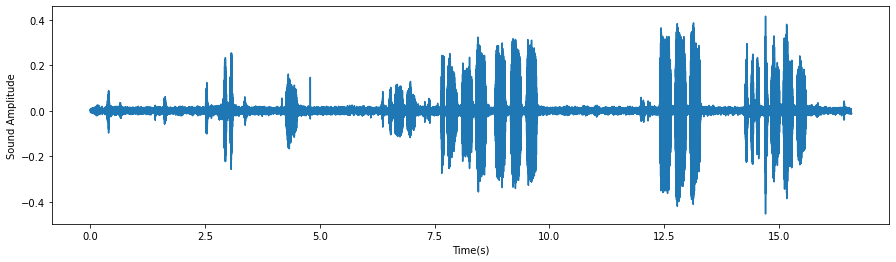

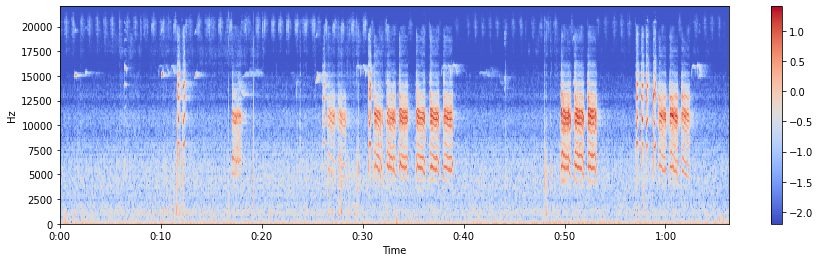

In [4]:
x, fs = load_wave_data(file_path)
melsp = caluculate_melsp(x)
print("wave_size:{0}\nmelsp_size:{1}\nsampling_rate:{2}".format(x.shape, melsp.shape, fs))
show_wave(x, fs)
show_melsp(melsp, fs)
display(IPython.display.Audio(x, rate=fs))

# Dataframe

In [5]:
# set file path, file dir, file name, categories information to pandas dataframe
path = []
dirs = []
files = []
categories = []
bird_dirs = glob.glob(os.path.join(data_dir,'*'))
for bird_dir in bird_dirs:
    wav_paths = glob.glob(os.path.join(bird_dir,'*'))
    for wav_path in wav_paths:
        wav_file_name = wav_path.split('/')[-1]
        wav_file_dir = wav_path.replace(wav_file_name, '')
        path.append(wav_file_dir + wav_file_name)
        dirs.append(wav_file_dir)
        files.append(wav_file_name)
        categories.append(bird_dir.split('/')[-1])

In [6]:
meta_data = pd.DataFrame(list(zip(path, dirs, files, categories)), columns = ['paths', 'file_dirs', 'file_names', 'categories'])
# set unique id of categories
meta_data['target'] = meta_data['categories'].factorize()[0]

In [9]:
# add melsp and wav information
def func(row):
    _x, _fs = load_wave_data(row.paths)
    _melsp = caluculate_melsp(_x)
    with wave.open(os.path.join(row.file_dirs, row.file_names), 'rb') as wr:
        _ch = wr.getnchannels()
        _width = wr.getsampwidth()
        _fr = wr.getframerate()
        _fn = wr.getnframes()
    return pd.Series([_x.shape, _fs, _melsp.shape, _ch, _width, _fr, _fn, _fn/_fr])

meta_data[['wav_shape', 'sample_rates', 'melsp_shape', 'wav_channels', 'wav_sample_size', 'wav_sampling_rate', 'wav_frame_rate', 'wav_time']] = meta_data.apply(func, axis=1)

In [10]:
meta_data

,paths,file_dirs,file_names,categories,target,wav_shape,sample_rates,melsp_shape,wav_channels,wav_sample_size,wav_sampling_rate,wav_frame_rate,wav_time
0,/home/wataru/code/b-com/b-com/data/sijuukara/sijuukara_gsqueal6.wav,/home/wataru/code/b-com/b-com/data/sijuukara/,sijuukara_gsqueal6.wav,sijuukara,0,"(565248,)",44100,"(128, 4417)",2,2,44100,565248,12.817415
1,/home/wataru/code/b-com/b-com/data/sijuukara/sijuukara_gsqueal5.wav,/home/wataru/code/b-com/b-com/data/sijuukara/,sijuukara_gsqueal5.wav,sijuukara,0,"(499712,)",44100,"(128, 3905)",2,2,44100,499712,11.331338
2,/home/wataru/code/b-com/b-com/data/sijuukara/sijuukara_twitter1.wav,/home/wataru/code/b-com/b-com/data/sijuukara/,sijuukara_twitter1.wav,sijuukara,0,"(1196032,)",44100,"(128, 9345)",2,2,44100,1196032,27.120907
3,/home/wataru/code/b-com/b-com/data/sijuukara/sijuukara_gsqueal8.wav,/home/wataru/code/b-com/b-com/data/sijuukara/,sijuukara_gsqueal8.wav,sijuukara,0,"(737280,)",44100,"(128, 5761)",2,2,44100,737280,16.718367
4,/home/wataru/code/b-com/b-com/data/sijuukara/sijuukara_gsqueal2.wav,/home/wataru/code/b-com/b-com/data/sijuukara/,sijuukara_gsqueal2.wav,sijuukara,0,"(638976,)",44100,"(128, 4993)",2,2,44100,638976,14.489252
5,/home/wataru/code/b-com/b-com/data/sijuukara/sijuukara_gsqueal4.wav,/home/wataru/code/b-com/b-com/data/sijuukara/,sijuukara_gsqueal4.wav,sijuukara,0,"(618496,)",44100,"(128, 4833)",2,2,44100,618496,14.024853
6,/home/wataru/code/b-com/b-com/data/sijuukara/sijuukara_gsqueal7.wav,/home/wataru/code/b-com/b-com/data/sijuukara/,sijuukara_gsqueal7.wav,sijuukara,0,"(413696,)",44100,"(128, 3233)",2,2,44100,413696,9.380862
7,/home/wataru/code/b-com/b-com/data/sijuukara/sijuukara_gsqueal3.wav,/home/wataru/code/b-com/b-com/data/sijuukara/,sijuukara_gsqueal3.wav,sijuukara,0,"(851968,)",44100,"(128, 6657)",2,2,44100,851968,19.319002
8,/home/wataru/code/b-com/b-com/data/sijuukara/sijuukara_gsqueal9.wav,/home/wataru/code/b-com/b-com/data/sijuukara/,sijuukara_gsqueal9.wav,sijuukara,0,"(630784,)",44100,"(128, 4929)",2,2,44100,630784,14.303492
9,/home/wataru/code/b-com/b-com/data/sijuukara/sijuukara_gsqueal1.wav,/home/wataru/code/b-com/b-com/data/sijuukara/,sijuukara_gsqueal1.wav,sijuukara,0,"(622592,)",44100,"(128, 4865)",2,2,44100,622592,14.117732


# Augumentation

In [5]:
# add white noise
# randn:平均0、分散1 引数はサイズ
def add_white_noise(x, rate=0.002):
    return x + rate*np.random.randn(len(x))

In [6]:
# shift sound in timeframe
# rollでいいのか検討
def shift_sound(x, rate=2):
    return np.roll(x, int(len(x)//rate))

In [7]:
# stretch sound
def stretch_sound(x, rate=1.1):
    input_length = len(x)
    # Time-stretch an audio series by a fixed rate.
    x = librosa.effects.time_stretch(x, rate)
    if len(x) > input_length:
        return x[:input_length]
    else:
        return np.pad(x, (0, max(1, input_length - len(x))), "constant")

# Training dataset and test dataset

In [11]:
x = list(meta_data.loc[:,"paths"])
y = list(meta_data.loc[:,"target"])

In [12]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.25, stratify=y)

In [13]:
# check data length
print('x_train data length:\t{}\ny_train data length:\t{}\nx_test data length:\t{}\ny_test data length:\t{}'.format(len(x_train),
                                                                                                                    len(y_train),
                                                                                                                    len(x_test),
                                                                                                                    len(y_test)))

x_train data length:	12
y_train data length:	12
x_test data length:	5
y_test data length:	5


In [14]:
# check test data classes
a = np.zeros(2)
for c in y_test:
    a[c] += 1
print(a)

[3. 2.]


# Transform wav to mel-stft array

In [30]:
# this parameter decied input data size
# frequency: vertical axis
freq = 128
# time: horizontal axis
time = 4417

In [31]:
# save wave data in npz, with augmentation
def save_np_data(filename, x, y, aug=None, rates=None):
    np_data = np.zeros(len(x)*freq*time).reshape(len(x), freq, time)
    np_targets = np.zeros(len(y))
    for i in range(len(y)):
        _x, _fs = load_wave_data(x[i])
        if aug is not None:
            _x = aug(x=_x, rate=rates[i])
        _x = caluculate_melsp(_x)
        np_data[i] = _x
        np_targets[i] = y_train[i]
    np.savez(filename, x=np_data, y=np_targets)

In [32]:
# save test dataset
if not os.path.exists("test.npz"):
    save_np_data("test.npz", x_test, y_test)

ValueError: could not broadcast input array from shape (128,9345) into shape (128,4417)